In [1]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime

**County Level Census Data: https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2017_county_data.csv**

In [45]:
acs_census = pd.read_csv("data/acs2017_county_data.csv")
acs_census = acs_census.rename(columns={x:x.lower() for x in acs_census.columns})
acs_census = acs_census.rename(columns={"countyid":"fips"})
acs_census.county = acs_census.county.apply(lambda x: x.split('County')[0].rstrip())

**County Level COVID Data: https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv**

In [47]:
covid_by_county = pd.read_csv("data/covid-us-counties.csv")
covid_by_county.date = pd.to_datetime(covid_by_county.date, format="%Y-%m-%d")
covid_by_county = covid_by_county[covid_by_county['fips'] > 0]
covid_by_county.fips = covid_by_county.fips.astype(int)

**Combine Census and COVID Datasets**

In [53]:
# merge on latest date
covid_and_census = pd.merge(covid_by_county[covid_by_county.date == '2020-04-11'], acs_census, on=('county', 'state', 'fips'), 
                  how = 'inner')
covid_and_census['percentinfected'] = 100.*covid_and_census.cases/covid_and_census.totalpop

**What is correlated with number of cases on 4/11/2020?**

In [54]:
covid_and_census.corr().style.background_gradient(cmap='magma')

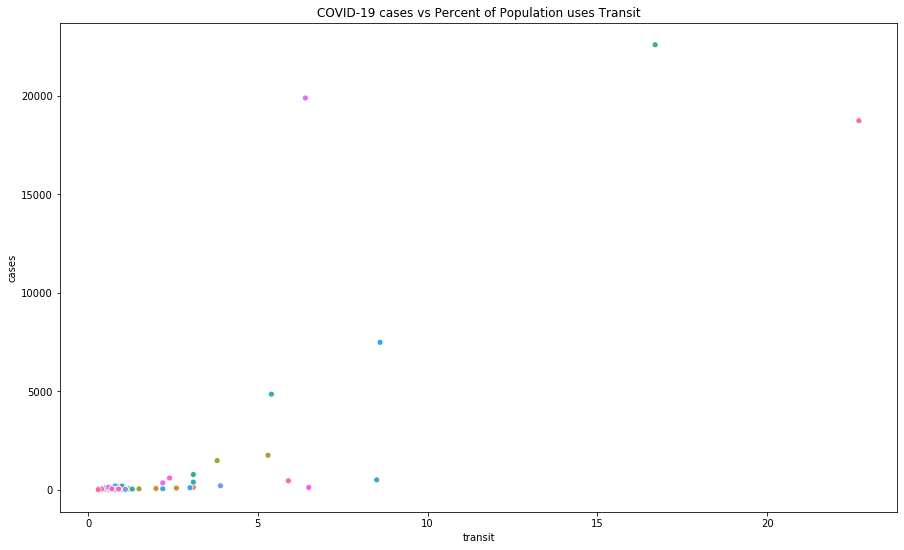

In [59]:
plt.figure(figsize=(15,9))
plt.title('COVID-19 cases vs Percent of Population uses Transit')
splot = sns.scatterplot(x="transit", y="cases", hue="county", legend=False, data=covid_and_census[covid_and_census.state == "New York"])
plt.show()

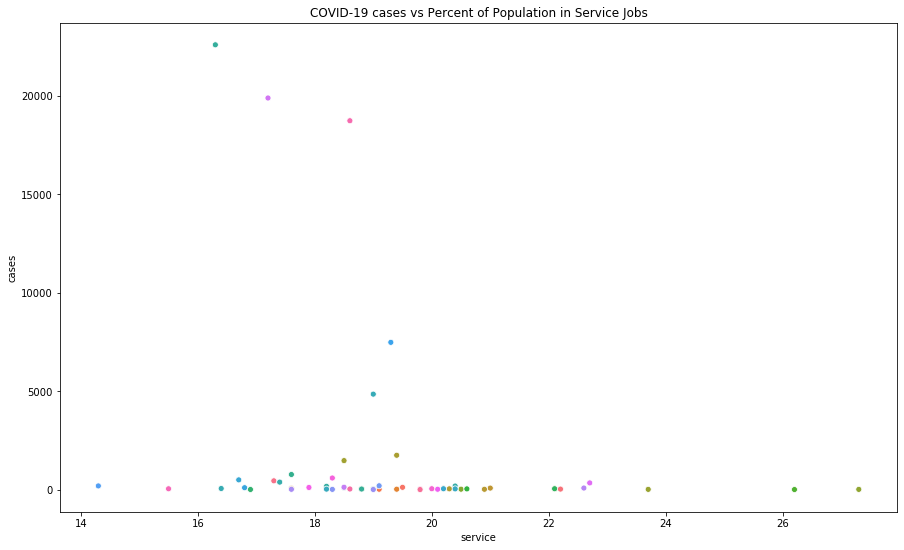

In [58]:
plt.figure(figsize=(15,9))
plt.title('COVID-19 cases vs Percent of Population in Service Jobs')
splot = sns.scatterplot(x="service", y="cases", hue="county", legend=False, data=covid_and_census[covid_and_census.state == "New York"])
plt.show()